# D208 PA Task 1 - Predictive Modeling - Linear Regression Modeling

Shanay Murdock

WGU MSDA-DS Masters Candidate

# Part I: Research Question

## A1. Research Question

I aim to explore the following research question: "What factors contribute to customer tenure?" 

Customer churn is a significant issue in the highly competitive telecommunications market, with some companies experiencing churn rates as high as 25% annually (per D208 Data Dictionary). To avoid customers leaving and signing up with competitors, there is much to be gained across the company by understanding what factors keep existing customers and improving tenure over time. This analysis can aid informed decision-making by understanding what factors to capitalize on and which need dedicated improvement.

## A2. Goals

This analysis aims to gain greater insight into what factors directly contribute to customer tenure. Multiple linear regression can be used to assess what factors in the dataset (independent variables) directly impact customer tenure (dependent variable). Identification of these factors can assist executives in being more responsive to what drives customers to stay with the company versus leaving the company for a competitor. This frees up resources needed to recruit as many new or previous customers as possible and works to gain more long-term customer loyalty. Linear regression allows us to make predictions based on certain conditions; early alerts for potential customer churn give the company time to pivot and address issues that could retain customers, whether from a customer service perspective or a quality of service perspective.

# Part II: Method Justification

## B1. Summary of Assumptions

We can make the following four assumptions of a multiple linear regression model [(Bobbit, 2021)](https://www.statology.org/multiple-linear-regression-assumptions/):

**Assumption 1:** Linear relationships exist. A linear relation exists between the target variable and each predictor variable.

**Assumption 2:** There is no multicollinearity. None of the predictor variables have a high correlation with each other. High correlations among predictor variables create data redundancies, and having more correlated data reduces the value it can provide. This assumption is shared with multiple logistic regression.

**Assumption 3:** Observations are independent of each other. One observation cannot be the reason another observation exists in the dataset, there cannot be any repeat measurements of the same identity, and observations cannot be related to each other in any way. This assumption is shared with multiple logistic regression.

**Assumption 4:** There is multilinear normality. Any residuals of the model are normally distributed.

## B2. Tool Benefits

I use Python throughout this project because of its vast and ready-to-use collection of packages and libraries designed for data cleaning, analysis, exploration, visualization, and regression modeling.

Pandas allows Python to interact with data like a spreadsheet, implementing a tabular structure. NumPy adds statistical and mathematical capabilities to detect summary statistics and correlation metrics.

Matplotlib and Seaborn are data visualization packages that provide graphing functionality, aiding in data analysis and exploration in ways that reading raw data can't offer.

Multiple linear regression is a statistical method that predicts a response (target) variable by combining several explanatory (predictor) variables. Python and libraries like statsmodels and Scikit-learn provide an efficient and convenient way to implement multiple linear regression. With these packages, one can easily preprocess data, split it into training and testing sets, fit the model, and evaluate its performance.

Leveraging Python's ecosystem ensures flexibility, readability, and access to a wide range of data exploration, visualization, and model assessment tools. It's a powerful choice for data professionals due to its simplicity, extensive community support, and robustness in handling complex tasks.

## B3. Appropriate Technique

Multiple linear regression (MLR) is a powerful technique for predicting a continuous target variable using one or more continuous or categorical predictor variables.

MLR offers flexibility by accommodating continuous and categorical predictors, allowing for the modeling of complex relationships specific to a continuous target variable. Its flexibility extends further in that it's only limited to constraints on data types, not context or subject matter, allowing it to be used in any discipline.

MLR offers a straightforward way to interpret findings using coefficients to represent the impact of each predictor variable. It is also highly structured, meaning that because of the assumptions stated in B1, there are constraints on what data can be used to retrieve accurate output data. This places guidelines on what types of data (and their subsequent relationships) can be used in the model.

As I want to understand more about what contributes to `tenure`, a continuous variable, I believe multiple linear regression is appropriate for using the other numeric and categorical data available. While `tenure` has a finite maximum value in the dataset, it has no theoretical maximum beyond how long the company has been providing telecommunication services to customers. `tenure` is also measured precisely, using floats to measure the number of full and partial months.

# Part III: Data Preparation

## C1. Data Cleaning

### Data Cleaning Plan

Despite the provided Churn dataset being "clean,” there are a few remnant issues to take care of that I have assessed previously in D206 and D207.

Many variables should have their data types changed from numeric to object data or object data to categorical data. The categories will be further treated to impose numeric encoding on the categories used within the linear model. Because we have familiarity from having worked on this dataset, this step can be done using a mapping dictionary and then passing that dictionary in the data import statement. Ordered categorical variables (the survey questions) will be treated separately.

The columns identifying ZIP codes, latitude, and longitude values will be recast as string/object types as they are geographical identifiers. While this step could be treated as optional, recasting the data type will prevent any general statistical methods from treating `lat` and `lng` as potential variables for the regression model.

I renamed the column headers to Pythonic convention using snake case. This is done for two reasons:

1. To have consistency in line with industry standards, making code easy to read among data collaborators.
2. To provide clarity to variables with titles that leave the meaning of the data ambiguous. For instance, `phone` typically denotes a phone number (object datatype), whereas here, it denotes the binary status indicating whether or not a customer has phone service with the company.

The next step is to fix the missing leading 0s on many East Coast ZIP codes that start with 0. The data is imported from the CSV as a numerical value rather than a string value that acts as a geographical identifier. Changing to a string value and prepending the missing 0s will retain that data. *Note: While the data type conversion is mandatory, replacing the misleading 0s is optional in the cleaning phase, as the variable won't be used as a predictor variable in the model. However, it is best practice to proceed.*

I will collapse the Time zone variable from 26 to the standard 7 US time zones, making them more useful. As they stand, they are more indicative of regions than time zones.

The variables I have treated as Booleans in previous PAs can be left as categorical data for now, as encoding methods will be implemented in preparation for the linear regression model.

Lastly, the survey questions will be recast as ordinal variables to indicate the nature of their ranking. These are unintuitively set as `1` being the most important factor and `8` being the least important factor, so these values will be reversed for clarity in the analysis. This will ensure we don't reverse any correlation unintentionally.

There are no duplicate or null values to treat. Outliers will be replaced with median values to preserve normal distributions.

### Libraries and Data

In [1]:
# Libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Additional visualization settings
%matplotlib inline
sns.set_style('whitegrid')

# Disable deprecation warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Recast data types with previously known info about the dataset
# (Jones, DataCamp, 2024)
churn_dtypes = {
		"Zip": "str",
		"Lat": "str",
		"Lng": "str",
		"Area": "category",
		"TimeZone": "category",
		"Marital": "category",
		"Gender": "category",
		"Churn": "category",
		"Techie": "category",
		"Contract": "category",
		"Port_modem": "category",
		"Tablet": "category",
		"InternetService": "category",
		"Phone": "category",
		"Multiple": "category",
		"OnlineSecurity": "category",
		"OnlineBackup": "category",
		"DeviceProtection": "category",
		"TechSupport": "category",
		"StreamingTV": "category",
		"StreamingMovies": "category",
		"PaperlessBilling": "category",
		"PaymentMethod": "category",
		"Item1": "category",
		"Item2": "category",
		"Item3": "category",
		"Item4": "category",
		"Item5": "category",
		"Item6": "category",
		"Item7": "category",
		"Item8": "category",
}

In [3]:
# Load the dataset, preserving "None" values present in columns
churn = pd.read_csv('churn_clean.csv', keep_default_na=False, dtype=churn_dtypes)
churn.set_index("CaseOrder", inplace=True, verify_integrity=True)

# Set option to not truncate results with large number of columns
pd.set_option("display.max_columns", None)

In [4]:
churn.index

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
        9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999, 10000],
      dtype='int64', name='CaseOrder', length=10000)

In [5]:
churn.index.nunique()

10000

### Initial Inspection

In [6]:
churn.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
# Inspect the DataFrame
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Customer_id           10000 non-null  object  
 1   Interaction           10000 non-null  object  
 2   UID                   10000 non-null  object  
 3   City                  10000 non-null  object  
 4   State                 10000 non-null  object  
 5   County                10000 non-null  object  
 6   Zip                   10000 non-null  object  
 7   Lat                   10000 non-null  object  
 8   Lng                   10000 non-null  object  
 9   Population            10000 non-null  int64   
 10  Area                  10000 non-null  category
 11  TimeZone              10000 non-null  category
 12  Job                   10000 non-null  object  
 13  Children              10000 non-null  int64   
 14  Age                   10000 non-null  int64   
 15  Income 

In [8]:
# Check for missing values
churn.isna().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [9]:
# Check for any duplicate values
churn.duplicated().sum()

0

### Data Cleaning

In [10]:
# Replace column headers with Pythonic names
column_headers = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area_type',
    'TimeZone': 'time_zone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Employment': 'employment',
    'Income': 'income',
    'Marital': 'marital',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_per_week',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equipment_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'portable_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service',
    'Multiple': 'multiple_services',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'survey_timely_response',
    'Item2': 'survey_timely_fixes',
    'Item3': 'survey_timely_replacements',
    'Item4': 'survey_reliability',
    'Item5': 'survey_service_options',
    'Item6': 'survey_respectful_response',
    'Item7': 'survey_courteous_exchange',
    'Item8': 'survey_active_listening',
}
churn.rename(columns=column_headers, inplace=True)

In [11]:
# Fill in leading 0's for ZIP codes
churn['zip'] = churn['zip'].str.zfill(5)
churn['zip'].min()

'00601'

In [12]:
# Inspect DataFrame for columns of interest
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customer_id                 10000 non-null  object  
 1   interaction                 10000 non-null  object  
 2   UID                         10000 non-null  object  
 3   city                        10000 non-null  object  
 4   state                       10000 non-null  object  
 5   county                      10000 non-null  object  
 6   zip                         10000 non-null  object  
 7   lat                         10000 non-null  object  
 8   lng                         10000 non-null  object  
 9   population                  10000 non-null  int64   
 10  area_type                   10000 non-null  category
 11  time_zone                   10000 non-null  category
 12  job                         10000 non-null  object  
 13  children             

In [13]:
# Set new ordered categories for survey questions
# (Jones, DataCamp, 2024)
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3",
                                                "2", "1"], ordered=True)
survey_questions = ['survey_timely_response', 'survey_timely_fixes',
                    'survey_timely_replacements', 'survey_reliability',
                    'survey_service_options', 'survey_respectful_response',
                    'survey_courteous_exchange', 'survey_active_listening']
churn[survey_questions] = churn[survey_questions].astype(str)
churn[survey_questions] = churn[survey_questions].astype(survey_responses)

In [14]:
# Inspect DataFrame for columns of interest
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customer_id                 10000 non-null  object  
 1   interaction                 10000 non-null  object  
 2   UID                         10000 non-null  object  
 3   city                        10000 non-null  object  
 4   state                       10000 non-null  object  
 5   county                      10000 non-null  object  
 6   zip                         10000 non-null  object  
 7   lat                         10000 non-null  object  
 8   lng                         10000 non-null  object  
 9   population                  10000 non-null  int64   
 10  area_type                   10000 non-null  category
 11  time_zone                   10000 non-null  category
 12  job                         10000 non-null  object  
 13  children             

### Check for outliers

In [15]:
# Write a function to check for any outliers in churn_reg
# (Boorman & Weber, DataCamp, 2024)
def detect_outliers(df):
    """Detect outliers and return outlier values based on IQR thresholds.

    :param df: DataFrame to be passed
    :return: dictionary of column:outlier key:value pairs

    >>> detect_outliers(df)
    221     18.195425
    """
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

In [16]:
# Use the function to check for any outliers in churn
outliers = detect_outliers(churn)
for column, outlier_values in outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_values)
    print("Count of outliers:", outlier_values.count())
    print("-" * 50)

Outliers in population:
CaseOrder
12      33372
17      50079
30      52484
45      35743
52      39649
        ...  
9937    38703
9980    32425
9988    87509
9997    77168
9999    35575
Name: population, Length: 937, dtype: int64
Count of outliers: 937
--------------------------------------------------
Outliers in children:
CaseOrder
31       9
98      10
132      8
145     10
146      8
        ..
9823     8
9861     8
9872    10
9902     9
9947     8
Name: children, Length: 401, dtype: int64
Count of outliers: 401
--------------------------------------------------
Outliers in age:
Series([], Name: age, dtype: int64)
Count of outliers: 0
--------------------------------------------------
Outliers in income:
CaseOrder
14      115114.57
47      132116.33
93      115510.46
131     125814.88
137     122957.19
          ...    
9865    108806.60
9877    128468.00
9892    121219.60
9922    109058.00
9978    117089.40
Name: income, Length: 336, dtype: float64
Count of outliers: 336
-------

There are no significant outliers in `age`, `tenure`, `monthly_charge`, or `bandwidth_gb_year`.

Outliers were detected in `children`, `income`, `outage_sec_per_week`, `email`, `contacts`, and `yearly_equipment_failure`.

- The 401 outlier values in `children` are not illogical for a dataset of 10,000 observations. They will be left as they are.
- The 336 outlier values in `income` are not illogical but drastically skew the summary statistics of the variable. The median will be imputed for any outlier values.
- The 76 outlier values in `outage_sec_per_week` are not illogical for a dataset of 10,000 observations. They will be left as they are.
- The 38 outlier values in `email` are not illogical for a dataset of 10,000 observations when the measurement is by year. They will be left as they are.
- The 8 outlier values in `contacts` are not illogical for a dataset of 10,000 observations and could potentially provide insight into rates of `tenure` or `churn`. They will be left as they are.
- The 94 outlier values in `yearly_equipment_failure` are not illogical for a dataset of 10,000 observations and could potentially provide insight into rates of  `tenure` or `churn` rates. They will be left as they are.

In [17]:
# Detect and replace problematic outliers
# (Boorman & Weber, DataCamp, 2024)
def detect_and_replace_outliers(df, column):
    """Detect outlier values. Replace with median value.

    :param df: DataFrame to be passed
    :param column: name of column to be checked for outliers
    :return: DataFrame with outliers replaced with median value; outlier values
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Replace outliers with the median value
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

    return df, outliers

In [18]:
# Check the distribution of income at 10 percentile increments
# (Walker, 2024)
churn['income'].quantile(np.arange(0.0, 1.1, 0.1))

0.0       348.670
0.1     10933.561
0.2     16421.998
0.3     22019.206
0.4     27206.664
0.5     33170.605
0.6     40133.764
0.7     48302.334
0.8     59320.312
0.9     77701.911
1.0    258900.700
Name: income, dtype: float64

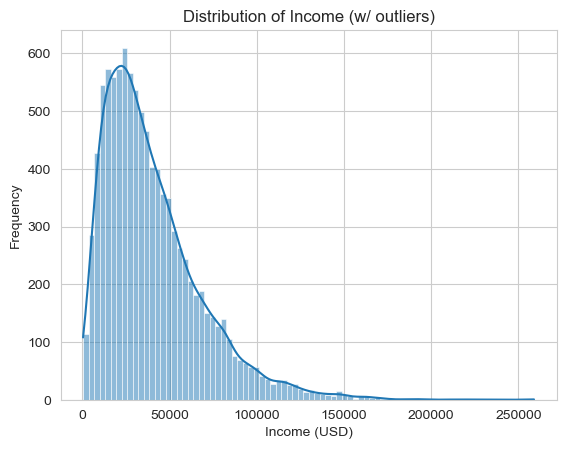

In [19]:
# Plot income prior to treatment of outliers
sns.histplot(data=churn,
             x='income',
             kde=True);

# Set title
plt.title('Distribution of Income (w/ outliers)');
plt.xlabel('Income (USD)');
plt.ylabel('Frequency');

In [20]:
# Detect and replace outliers for `income`
churn_reg, outliers = detect_and_replace_outliers(churn, 'income')
print("Outliers detected and replaced:")
print(outliers)

Outliers detected and replaced:
CaseOrder
14      115114.57
47      132116.33
93      115510.46
131     125814.88
137     122957.19
          ...    
9865    108806.60
9877    128468.00
9892    121219.60
9922    109058.00
9978    117089.40
Name: income, Length: 336, dtype: float64


In [21]:
# Check the distribution of income at 10 percentile increments
# (Walker, 2024)
churn['income'].quantile(np.arange(0.0, 1.1, 0.1))

0.0       348.6700
0.1     10933.5610
0.2     16421.9980
0.3     22019.2060
0.4     27206.6640
0.5     33169.7425
0.6     37627.8980
0.7     45397.0300
0.8     55113.8920
0.9     70309.3100
1.0    104166.7000
Name: income, dtype: float64

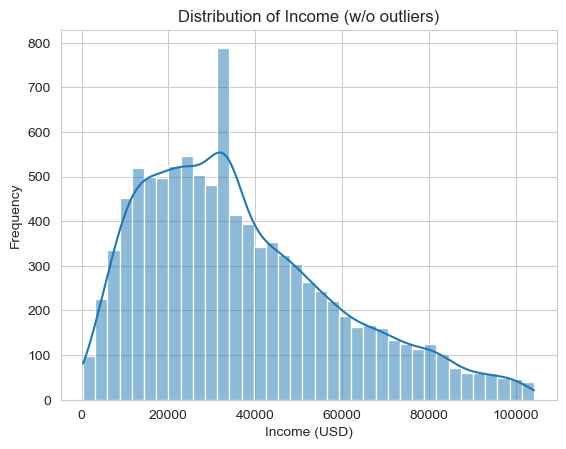

In [22]:
# Plot income prior to treatment of outliers
sns.histplot(data=churn,
             x='income',
             kde=True);

# Set title
plt.title('Distribution of Income (w/o outliers)');
plt.xlabel('Income (USD)');
plt.ylabel('Frequency');

In [23]:
# Use the function to check for any outliers in churn_reg
outliers = detect_outliers(churn)
for column, outlier_values in outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_values)
    print("Count of outliers:", outlier_values.count())
    print("-" * 50)

Outliers in population:
CaseOrder
12      33372
17      50079
30      52484
45      35743
52      39649
        ...  
9937    38703
9980    32425
9988    87509
9997    77168
9999    35575
Name: population, Length: 937, dtype: int64
Count of outliers: 937
--------------------------------------------------
Outliers in children:
CaseOrder
31       9
98      10
132      8
145     10
146      8
        ..
9823     8
9861     8
9872    10
9902     9
9947     8
Name: children, Length: 401, dtype: int64
Count of outliers: 401
--------------------------------------------------
Outliers in age:
Series([], Name: age, dtype: int64)
Count of outliers: 0
--------------------------------------------------
Outliers in income:
CaseOrder
63      100076.65
99      103311.26
165      96382.76
238      99195.08
418     100232.53
          ...    
9544    102633.90
9558     99071.31
9687    102173.50
9697     98120.00
9988    102629.60
Name: income, Length: 135, dtype: float64
Count of outliers: 135
-------

The 336 outlier values originally in `income` have been reduced down to 135 outliers. This due to the quartiles shifting after imputing the median in place of the original 336 outliers.

## C2. Summary Statistics

In [24]:
# Explore the remaining data
churn.head()

,customer_id,interaction,UID,city,state,county,zip,lat,lng,population,area_type,time_zone,job,children,age,income,marital,gender,churn,outage_sec_per_week,email,contacts,yearly_equipment_failure,techie,contract,portable_modem,tablet,internet_service,phone_service,multiple_services,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,tenure,monthly_charge,bandwidth_gb_year,survey_timely_response,survey_timely_fixes,survey_timely_replacements,survey_reliability,survey_service_options,survey_respectful_response,survey_courteous_exchange,survey_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [25]:
# Explore the remaining data
churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000,10000,K409198,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interaction,10000,10000,aa90260b-4141-4a24-8e36-b04ce1f4f77b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UID,10000,10000,e885b299883d4f9fb18e39c75155d990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,10000,6058,Houston,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,10000,52,TX,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,10000,1620,Washington,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,10000,8583,32340,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,10000,8563,40.88228,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lng,10000,8630,-97.06273,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,10000.0,NaN,NaN,NaN,9756.5624,14432.698671,0.0,738.0,2910.5,13168.0,111850.0


### Dependent (Target) Variable

In [27]:
# Summary statistics of Independent Variable (tenure)
churn['tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: tenure, dtype: float64

### Independent (Predictor) Variables

## C3. Visualizations

## C4. Data Transformation

In [28]:
# Collapse time zones
update_timezones = {
		'America/Sitka': 'US/Alaska',
    'America/Detroit': 'US/Eastern',
    'America/Los_Angeles': 'US/Pacific',
    'America/Chicago': 'US/Central',
    'America/New_York': 'US/Eastern',
    'America/Puerto_Rico': 'US/Atlantic',
    'America/Denver': 'US/Mountain',
    'America/Menominee': 'US/Central',
    'America/Phoenix': 'US/Mountain',
    'America/Indiana/Indianapolis': 'US/Eastern',
    'America/Boise': 'US/Mountain',
    'America/Kentucky/Louisville': 'US/Eastern',
    'Pacific/Honolulu': 'US/Hawaii',
    'America/Indiana/Petersburg': 'US/Eastern',
    'America/Nome': 'US/Atlantic',
    'America/Anchorage': 'US/Alaska',
    'America/Indiana/Knox': 'US/Central',
    'America/Juneau': 'US/Alaska',
    'America/Toronto': 'US/Eastern',
    'America/Indiana/Winamac': 'US/Eastern',
    'America/Indiana/Vincennes': 'US/Eastern',
    'America/North_Dakota/New_Salem': 'US/Central',
    'America/Indiana/Tell_City': 'US/Central',
    'America/Indiana/Marengo': 'US/Eastern',
    'America/Ojinaga': 'US/Central'
}

churn["time_zone"] = churn["time_zone"].replace(update_timezones)
churn['time_zone'].dtype

CategoricalDtype(categories=['US/Alaska', 'US/Mountain', 'US/Central', 'US/Eastern',
                  'US/Pacific', 'US/Atlantic', 'US/Hawaii'],
, ordered=False, categories_dtype=object)

In [29]:
# Set new ordered categories for survey questions
# (Jones, DataCamp, 2024)
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3",
                                                "2", "1"], ordered=True)
survey_questions = ['survey_timely_response', 'survey_timely_fixes',
                    'survey_timely_replacements', 'survey_reliability',
                    'survey_service_options', 'survey_respectful_response',
                    'survey_courteous_exchange', 'survey_active_listening']
churn[survey_questions] = churn[survey_questions].astype(str)
churn[survey_questions] = churn[survey_questions].astype(survey_responses)

## C5. Prepared Dataset

# Part IV: Model Comparison and Analysis

## D1. Initial Model

## D2. Justification of Model Reduction

## D3. Reduced Linear Regression Model

## E1. Model Comparison

## E2. Output and Calculations

## E3. Code

# Part V: Data Summary and Implications

## F1. Results

## F2. Recommendations

# Part VI: Demonstration

## G. Panopto Video

## H. Sources of Third-Party Code

- [Boorman, G. and Weber, I. _DataCamp - Exploratory Data Analysis in Python_, 2024](https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python)
- [Jones, K. _DataCamp - Working with Categorical Data in Python_, 2024](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python)
- Walker, M. (2024). Python Data Cleaning Cookbook (2nd ed.). Packt Publishing.

## I. Other Sources

- [Bobbit, Z., 2021. _The Five Assumptions of Multiple Linear Regression_](https://www.statology.org/multiple-linear-regression-assumptions/)